# Imports

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from os import listdir

# Filtros

In [93]:
imgRuido = cv2.imread('./img/ruido.png', cv2.COLOR_BGR2GRAY)
imgRuido2 = cv2.imread('./img/ruido.jpg', cv2.COLOR_BGR2GRAY)

In [97]:
kernel = np.ones((5,5), np.float32)/25

In [98]:
dts1 = cv2.filter2D(imgRuido,-1,kernel)
blur1 = cv2.blur(imgRuido, (5,5))
dts2 = cv2.filter2D(imgRuido2,-1,kernel)
blur2 = cv2.blur(imgRuido2, (5,5))

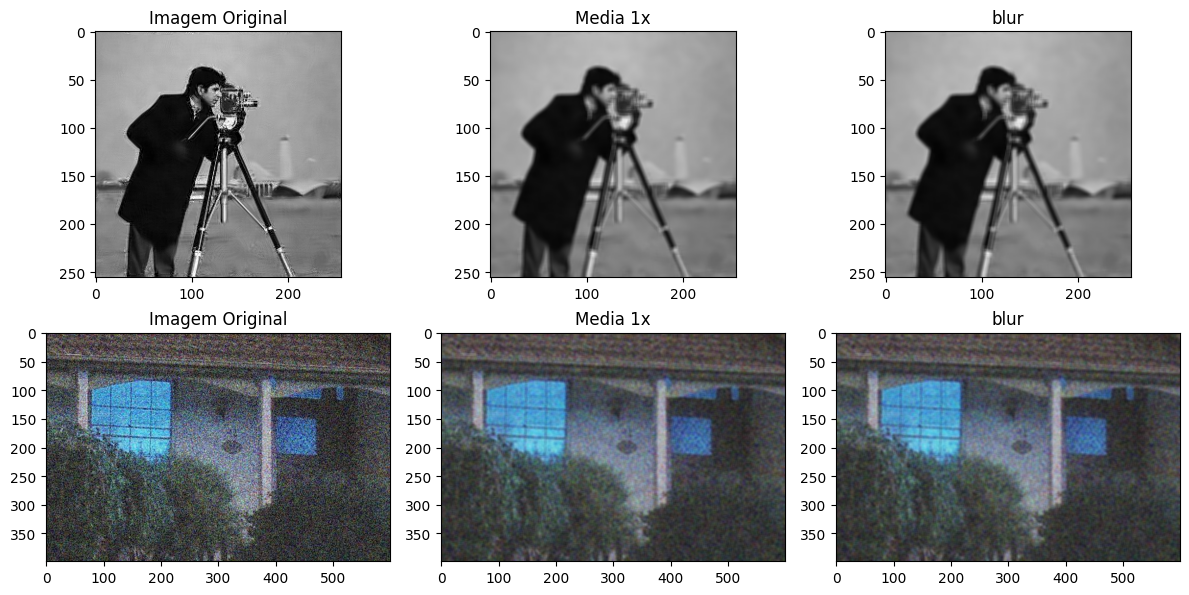

In [99]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(imgRuido)
plt.title('Imagem Original')

plt.subplot(2, 3, 2)
plt.imshow(dts1)
plt.title('Media 1x')

plt.subplot(2, 3, 3)
plt.imshow(blur1)
plt.title('blur')

plt.subplot(2, 3, 4)
plt.imshow(imgRuido2)
plt.title('Imagem Original')

plt.subplot(2, 3, 5)
plt.imshow(dts2)
plt.title('Media 1x')

plt.subplot(2, 3, 6)
plt.imshow(blur2)
plt.title('blur')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()

# Erosão Dilatação

In [96]:
img = cv2.imread('./img/assinatura.png', cv2.COLOR_BGR2GRAY)

In [100]:
struct = np.ones((5,5), np.uint8)

In [101]:
img_erosao = cv2.erode(img, struct)

In [103]:
img_dilatacao = cv2.dilate(img, struct)

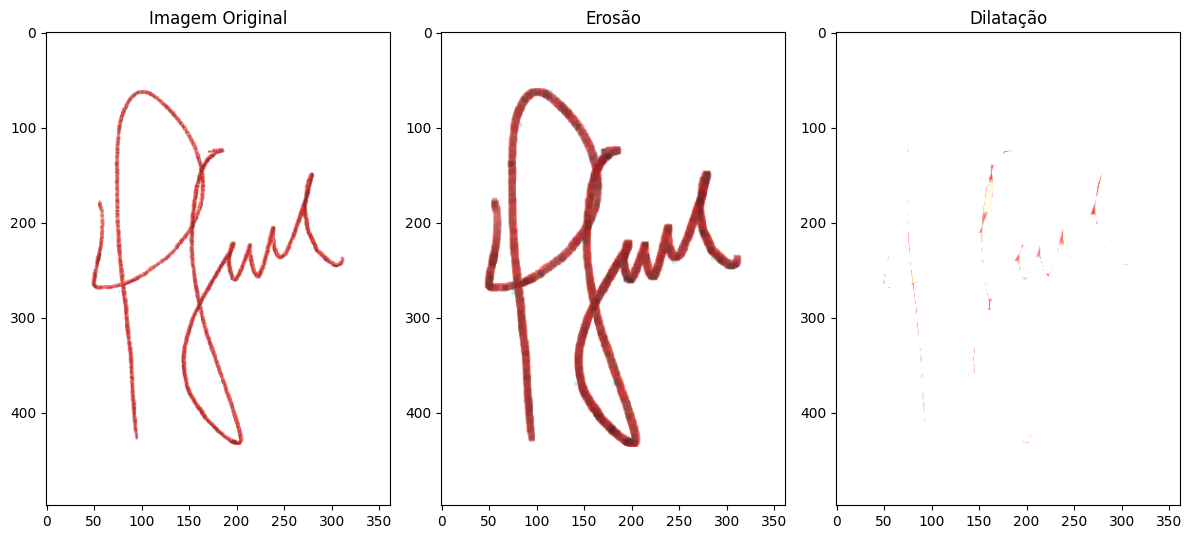

In [105]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Imagem Original')

plt.subplot(1, 3, 2)
plt.imshow(img_erosao)
plt.title('Erosão')

plt.subplot(1, 3, 3)
plt.imshow(img_dilatacao)
plt.title('Dilatação')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()

# Processamento de Imagens complexas

In [51]:
imagem = cv2.imread('./img/Screenshot_20240421_164523_Opera.jpg', cv2.COLOR_BGR2GRAY)

In [52]:
def embacar(img, tamanho):
    blurImg = cv2.blur(img, (tamanho, tamanho))
    return blurImg

def filtro_conv(img, kernel):
    return cv2.filter2D(img, -1, kernel)

In [53]:
# Filtros
aguca = np.array([
    [-1,-1,-1],
    [1, 0, -1],
    [1,1,0]
])

detect = np.array([
    [0,-1,-1],
    [1, 0, -1],
    [1,1,0]
])

sol = np.array([
    [0.272, 0.534, 0.131],
    [0.349, 0.686, 0.168],
    [0.393, 0.769, 0.189]
])

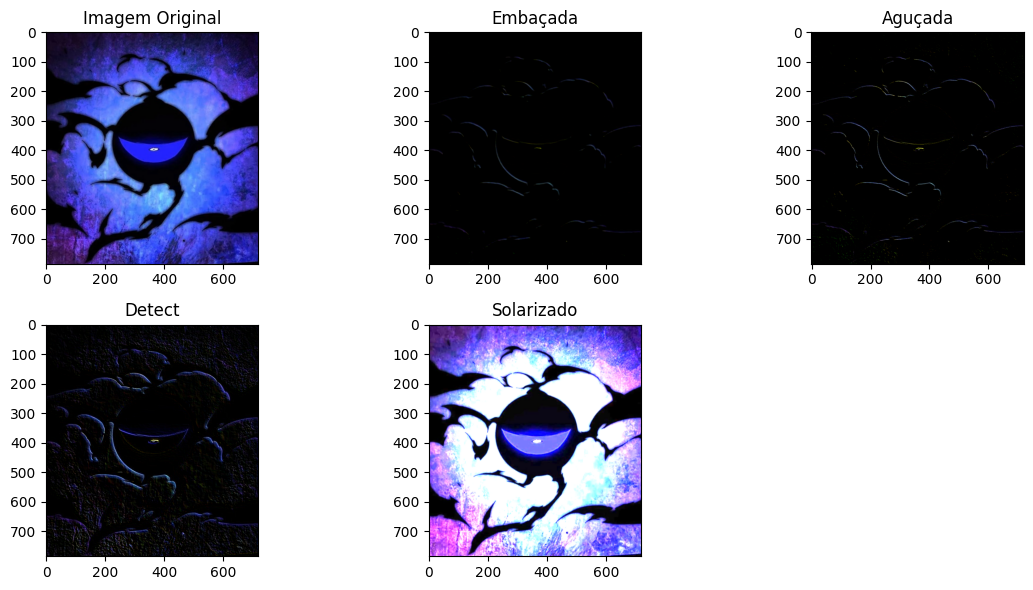

In [54]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(imagem)
plt.title('Imagem Original')

plt.subplot(2, 3, 2)
plt.imshow(filtro_conv(embacar(imagem, 5), aguca))
plt.title('Embaçada')

plt.subplot(2, 3, 3)
plt.imshow(filtro_conv(imagem, aguca))
plt.title('Aguçada')

plt.subplot(2, 3, 4)
plt.imshow(filtro_conv(imagem, detect))
plt.title('Detect')

plt.subplot(2, 3, 5)
plt.imshow(filtro_conv(imagem, sol))
plt.title('Solarizado')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()

# Análise e processamento de séries temporais

In [35]:
imgCena1 = cv2.imread('./img/cena1.png', cv2.COLOR_BGR2GRAY)
imgCena2 = cv2.imread('./img/cena2.png', cv2.COLOR_BGR2GRAY)
imgCena3 = cv2.imread('./img/cena3.png', cv2.COLOR_BGR2GRAY)
imgCena4 = cv2.imread('./img/cena4.png', cv2.COLOR_BGR2GRAY)

lista_media = list()
lista_media.append(np.mean(imgCena1.ravel()))
lista_media.append(np.mean(imgCena2.ravel()))
lista_media.append(np.mean(imgCena3.ravel()))
lista_media.append(np.mean(imgCena4.ravel()))

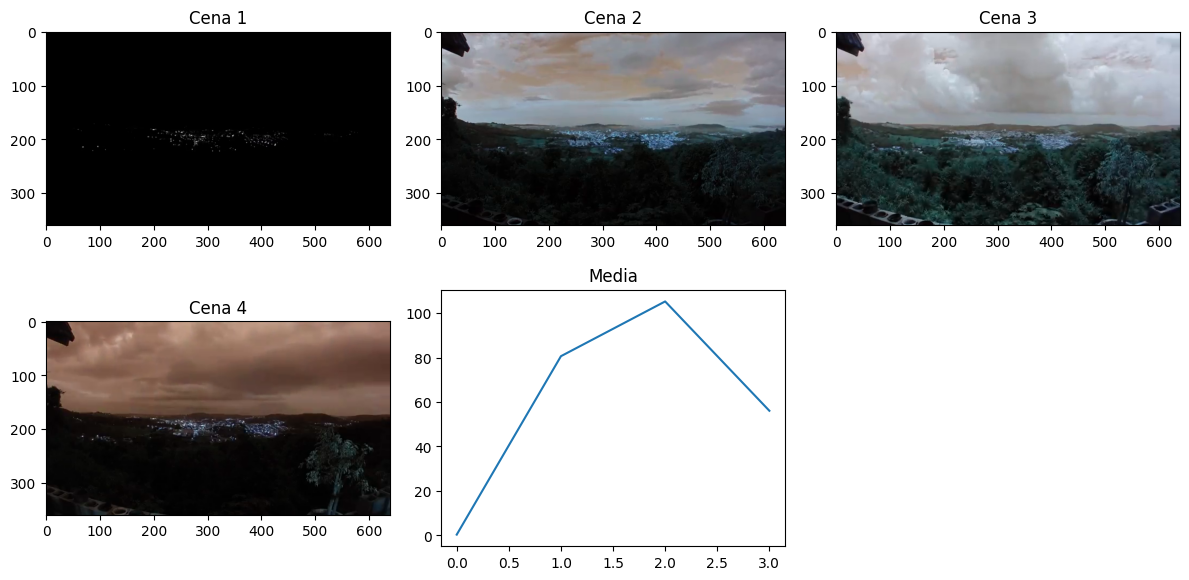

In [37]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(imgCena1)
plt.title('Cena 1')

plt.subplot(2, 3, 2)
plt.imshow(imgCena2)
plt.title('Cena 2')

plt.subplot(2, 3, 3)
plt.imshow(imgCena3)
plt.title('Cena 3')

plt.subplot(2, 3, 4)
plt.imshow(imgCena4)
plt.title('Cena 4')

plt.subplot(2, 3, 5)
plt.plot(lista_media)
plt.title('Media')

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.tight_layout()
plt.show()

In [31]:
def extract_data(arquivo):
    imgRet = cv2.imread(arquivo, cv2.COLOR_BGR2GRAY)
    imgMedia = np.mean(imgRet.ravel())
    
    return imgMedia

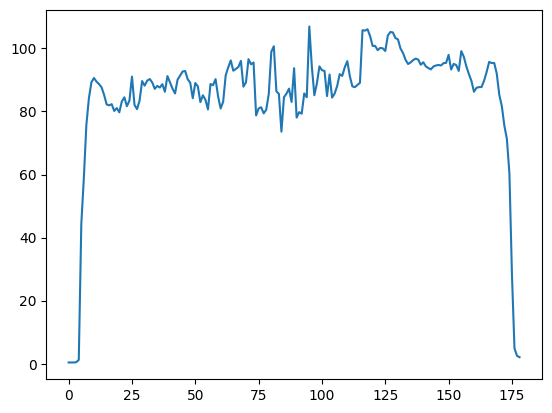

In [32]:
lista_arquivos = listdir('./img/cenas/')
listaMedia = list()

for nome_arquivo in lista_arquivos:
    listaMedia.append(extract_data('./img/cenas/' + nome_arquivo))
    
plt.plot(listaMedia)